In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data analysis

In [22]:
df = pd.read_csv("train_logs.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [24]:
df.describe()

,event_id,down_time,up_time,action_time,cursor_position,word_count
count,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06
mean,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,1.222964e+03,2.314687e+02
std,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,9.485242e+02,1.759088e+02
min,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,4.990000e+02,9.600000e+01
50%,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,1.043000e+03,2.000000e+02
75%,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,1.706000e+03,3.270000e+02
max,1.287600e+04,8.313630e+06,8.313707e+06,4.474700e+05,7.802000e+03,1.326000e+03


value count ~ 840500 words 
mean essay lenght ~ 231 words
max essay lenght ~ 1326 words
mean action time ~ 98 milliseconds
max action time ~ 4.5 seconds

In [25]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [26]:
print(f'count of unique ids {len(df["id"].unique())} \ncount of unique activities {len(df["activity"].unique())}') 
print(f'count of unique down events {len(df["down_event"].unique())}\ncount of unique up events {len(df["up_event"].unique())}')
print(f'count of unique text changes {len(df["text_change"].unique())}')

count of unique ids 2471 
count of unique activities 50
count of unique down events 131
count of unique up events 130
count of unique text changes 4111


In [27]:
for i in df["up_event"].unique():
    if i not in df["down_event"].unique():
        print(i)

k


<Axes: xlabel='word_count', ylabel='count'>

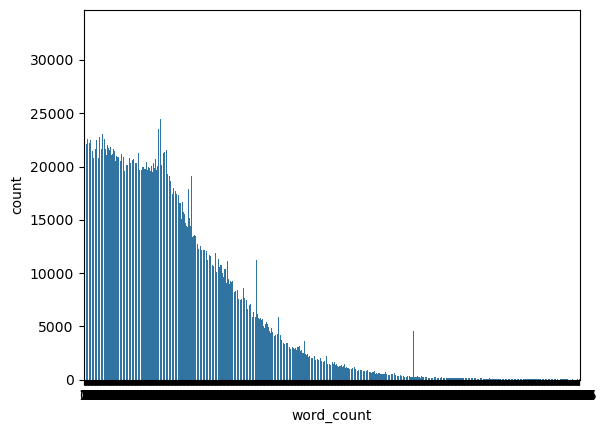

In [28]:
sns.countplot(data=df, x = df["word_count"])
#chujowo jest to zrobione, popraw żeby dół działał jak będziesz mieć czas, pewnie ogólnie można innym plotem to zrobić też

<Axes: xlabel='activity', ylabel='count'>

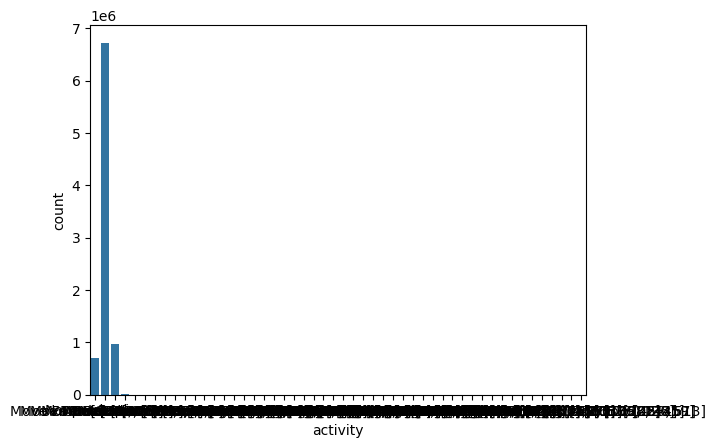

In [29]:
sns.countplot(data=df, x = df["activity"])
#ten sam problem co wyżej, ale i tak to pokazuje, że jakiejs aktywności jest o wiele więcej

<Axes: xlabel='up_event', ylabel='count'>

D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 155 (\x9b) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 134 (\x86) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
D:\anaconda\lib\site-packages\IPyt

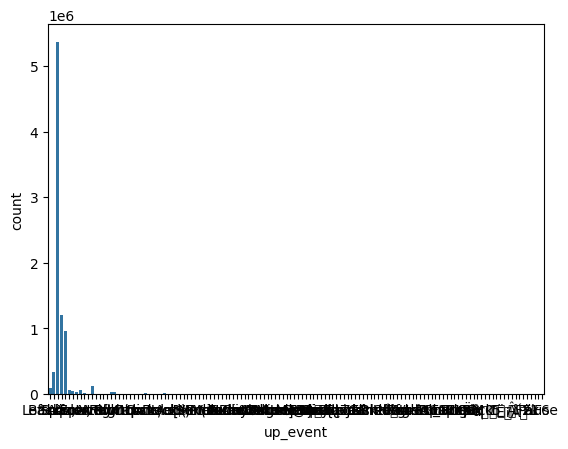

In [30]:
sns.countplot(data=df, x = df["up_event"])

In [31]:
temp = df.groupby(by="activity").count()

In [32]:
temp.head()

,id,event_id,down_time,up_time,action_time,down_event,up_event,text_change,cursor_position,word_count
activity,,,,,,,,,,
Input,6726796,6726796,6726796,6726796,6726796,6726796,6726796,6726796,6726796,6726796
"Move From [0, 158] To [234, 392]",1,1,1,1,1,1,1,1,1,1
"Move From [0, 1] To [590, 591]",1,1,1,1,1,1,1,1,1,1
"Move From [0, 75] To [1, 76]",1,1,1,1,1,1,1,1,1,1
"Move From [1041, 1121] To [1496, 1576]",1,1,1,1,1,1,1,1,1,1


In [33]:
temp = df.groupby(by="up_event").count()

In [34]:
temp.max()

id                 5364789
event_id           5364789
down_time          5364789
up_time            5364789
action_time        5364789
activity           5364789
down_event         5364789
text_change        5364789
cursor_position    5364789
word_count         5364789
dtype: int64

In [35]:
temp[temp["id"] > 10000]

,id,event_id,down_time,up_time,action_time,activity,down_event,text_change,cursor_position,word_count
up_event,,,,,,,,,,
',11170,11170,11170,11170,11170,11170,11170,11170,11170,11170
",",46806,46806,46806,46806,46806,46806,46806,46806,46806,46806
.,59586,59586,59586,59586,59586,59586,59586,59586,59586,59586
ArrowDown,30874,30874,30874,30874,30874,30874,30874,30874,30874,30874
ArrowLeft,63217,63217,63217,63217,63217,63217,63217,63217,63217,63217
ArrowRight,121338,121338,121338,121338,121338,121338,121338,121338,121338,121338
ArrowUp,28189,28189,28189,28189,28189,28189,28189,28189,28189,28189
Backspace,964089,964089,964089,964089,964089,964089,964089,964089,964089,964089
CapsLock,12568,12568,12568,12568,12568,12568,12568,12568,12568,12568


In [36]:
df.isnull().values.any()

False

In [45]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()

In [52]:
temp = encoder.fit_transform(df['activity'])

In [71]:
df[df['activity'] == "input"].count()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

In [80]:
from IPython.display import clear_output
i = 0
counter = 0
while(i<len(df['down_event'])):
    print('iteration:', i)
    i+=1
    if(df['down_event'][i] != df['up_event'][i]):
        counter +=1
        print('counter:', counter)
    clear_output(wait=True) 
print('counter:', counter)

iteration: 2564452


## TODO
- dokończyć oczyszczanie
a) usunąć niepotrzebne kolumny
b) ~principal komponent analysis
- korelacje
- algorytm 